# **PROBLEM DEFINITION**

The data set contains two integer types of features of 25 students

Let's take a look at the different variables of the data set.

1. Number of Attributes: 2 'Hours' & 'Scores'

2. Missing Attribute Values: none

QUESTIONS RELATED TO THE DATA SET

1. What will be predicted score if a student studies for 9.25 hrs/ day?
So,here our two main objective is

> **REGRESSION** : To calculate predicted score for the student who studies for 9.25 hrs/ day we will use Simple Linear regression using Scikit-learn where dependent variable is 'Scores' and independent variable is 'Hours.


> **Calculate Model Accuracy:** We will cslculate evaluation metric to judge performance of the model



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # statistical data visualization
%matplotlib inline

In [ ]:
students_score_data=pd.read_csv('/content/students score vs. study hours.csv')

## Exploratory data analysis 

Now, I have explored the data to gain insights about the data.

In [ ]:
# view dimensions of dataset

students_score_data.shape

(25, 2)

View top 5 rows of dataset

In [ ]:
students_score_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We can see that the column names are renamed. Now, the columns have meaningful names.

### **View summary of dataset**

In [ ]:
students_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Summary of variables**



*   There are 2 variables in the dataset. All the variables are of integer data type.
*   These are given by Hours, Scores.


*   Scores is the target variable.






Now, lets plot feature column 'Hours' vs target variable 'Scores', to see how linear is their relation:

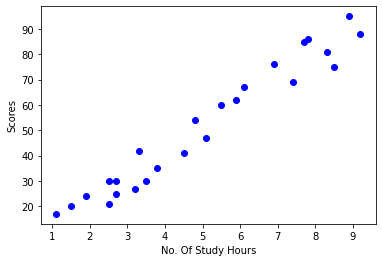

In [ ]:
plt.scatter(students_score_data.Hours, students_score_data.Scores,  color='blue')
plt.xlabel("No. Of Study Hours")
plt.ylabel("Scores")
plt.show()

# **Split data into separate training and test set**

In [ ]:
msk = np.random.rand(len(students_score_data)) < 0.8
train = students_score_data[msk]
test = students_score_data[~msk]

In [ ]:
train

,Hours,Scores
0,2.5,21
2,3.2,27
3,8.5,75
4,3.5,30
7,5.5,60
8,8.3,81
9,2.7,25
10,7.7,85
12,4.5,41
13,3.3,42


In [ ]:
test

,Hours,Scores
1,5.1,47
5,1.5,20
6,9.2,88
11,5.9,62
16,2.5,30
18,6.1,67
21,4.8,54
23,6.9,76


### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

Train data distribution

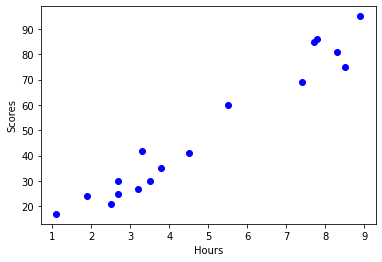

In [ ]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### **Modeling**
Linear Regression using sklearn package.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.93605908]]
Intercept:  [0.90154581]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.

# **Plot outputs**

we can plot the fit line over the data:

Text(0, 0.5, 'Scores Obtained')

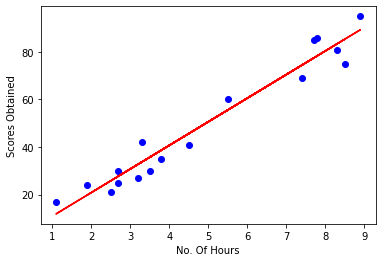

In [ ]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("No. Of Hours")
plt.ylabel("Scores Obtained")

# **Evaluation**
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 4.66
Residual sum of squares (MSE): 22.94
R2-score: 0.96
